In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family'] = ['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [72]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\서울열린데이터광장\서울시 뉴딜일자리 사업정보\*.json')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\서울열린데이터광장\\서울시 뉴딜일자리 사업정보\\서울시 뉴딜일자리 사업정보.json']

In [73]:
import json
 
with open(files[0],encoding='utf-8') as f:
    js = json.loads(f.read()) 

In [74]:
df = pd.DataFrame(columns=js['DESCRIPTION'].values())

for data in js['DATA']:
    tmp_df = pd.DataFrame(columns=js['DESCRIPTION'].values())
    for c in data:
        tmp_df[js['DESCRIPTION'][c.upper()]] = [data[c]]
    df = pd.concat([df,tmp_df],ignore_index=True)
df.head()

,파트타임 시급,전일근무 시급,뉴딜사업명,전일근무 일근로시간,상위사업분류,파트타임 계획인원,사업유형,근로기간 시작일자,전일근무 계획인원,사업목적,...,참여대상,근로기간 종료일자,이런일을 합니다,파트타임 일근로시간,전일근무 금회선발인원,사업년도,하위기관명,하위사업분류,사업담당자 전화번호,상위기관명
0,0,11157,고성능 분석장비를 이용한 286개 수질항목 모니터링,8,"환경,안전",0,시직접추진,20230403,1,○ 5년 이상의 경력을 보유한 서울물연구원의 전문 연구원으로부터 고성능 분석기기 ...,...,청년,20240329,"○ 고성능 분석기기(GC-MS/MS, LC-MS/MS, ICP-MS 등)를 사용하여...",0,None,2023,상수도사업본부,환경·에너지·안전,02-3146-1767,사업소
1,0,11157,"회계지원 활동가, 코디네이터",8,경제,0,자치구추긴,20230401,1,○ 사회적경제기업의 경쟁력 강화\r\n○ 관악구 사회적경제기업의 회계지원을 통한 기...,...,청년,20240331,○ 역할 \r\n？ 관내 사회적경제 기업의 회계업무지원\r\n - 관내 5~7개업체...,0,None,2023,관악구,기획·회계·사무,02-879-5753,자치구
2,0,11157,청년취업컨설팅 매니저,8,복지,0,자치구추긴,20230401,1,"취업난을 겪는 청년을 위한 청년 맞춤형 취업상담, 취업알선 등 구직활동 지원\r\n...",...,청년,20240331,○ 미취업 청년들의 어려움에 공감하고 청년과 소통하는 청년 맞춤 취업상담 및 구인구...,0,None,2023,강북구,사회복지·보육·상담,02-901-7253,자치구
3,0,11157,청각장애인과 함께하는 도서문화진흥 전문 사서 양성,8,문화,0,자치구추긴,20230401,2,○ 사회적약자인 청각장애인의 지식정보격차 해소와 독서 능력 강화를 지원하기 위해 청...,...,일반,20240331,○ 수어영상도서관 자료실 운영 및 관리(청각장애인을 위한 수어변환 대체영상자료 포함...,0,None,2023,서대문구,문화·예술·디자인·방송,02-330-1241,자치구
4,0,11157,주거관리 및 집수리 전문인력 양성,8,"교육,혁신",0,자치구추긴,20230401,2,○ 건축·건설 분야 고령화 및 초보자 취업연계의 어려움을 해소\r\n○ 집수리 및 ...,...,청년,20240331,"○ 역 할: 교육프로그램 기획 및 운영, 긴급 주거 집수리지원 및 교육 운영(...",0,None,2023,영등포구,건설·기계·재료·화학,02-2670-1665,자치구


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2037 entries, 0 to 2036
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   파트타임 시급      1602 non-null   object
 1   전일근무 시급      1612 non-null   object
 2   뉴딜사업명        2037 non-null   object
 3   전일근무 일근로시간   1615 non-null   object
 4   상위사업분류       2037 non-null   object
 5   파트타임 계획인원    1607 non-null   object
 6   사업유형         2037 non-null   object
 7   근로기간 시작일자    2035 non-null   object
 8   전일근무 계획인원    1624 non-null   object
 9   사업목적         1698 non-null   object
 10  근무조건         1639 non-null   object
 11  파트타임 금회선발인원  120 non-null    object
 12  부서명          1739 non-null   object
 13  참여대상         2032 non-null   object
 14  근로기간 종료일자    2035 non-null   object
 15  이런일을 합니다     1624 non-null   object
 16  파트타임 일근로시간   1605 non-null   object
 17  전일근무 금회선발인원  754 non-null    object
 18  사업년도         2037 non-null   object
 19  하위기관명        2037 non-null 

In [76]:
df.describe(include=np.object)

,파트타임 시급,전일근무 시급,뉴딜사업명,전일근무 일근로시간,상위사업분류,파트타임 계획인원,사업유형,근로기간 시작일자,전일근무 계획인원,사업목적,...,참여대상,근로기간 종료일자,이런일을 합니다,파트타임 일근로시간,전일근무 금회선발인원,사업년도,하위기관명,하위사업분류,사업담당자 전화번호,상위기관명
count,1602,1612,2037,1615,2037,1607,2037,2035,1624,1698,...,2032,2035,1624,1605,754,2037,2037,2037,2037,2037
unique,16,29,1627,9,5,45,4,199,75,1579,...,5,85,1509,9,44,11,105,17,926,5
top,0,10770,생활문화예술 코디네이터,8,문화,0,자치구추긴,20170101,2,.,...,청년,20171231,강소기업 등에서 현장실무 일경험\r\n기업 일경험 기간 중 역량강화 전담멘토 지정\...,0,2,2018,민간공모,문화·예술·디자인·방송,010--,자치구
freq,1350,262,6,1385,619,1431,906,262,251,21,...,1184,264,7,1407,132,309,250,588,409,879


In [77]:
df.isnull().sum()

파트타임 시급         435
전일근무 시급         425
뉴딜사업명             0
전일근무 일근로시간      422
상위사업분류            0
파트타임 계획인원       430
사업유형              0
근로기간 시작일자         2
전일근무 계획인원       413
사업목적            339
근무조건            398
파트타임 금회선발인원    1917
부서명             298
참여대상              5
근로기간 종료일자         2
이런일을 합니다        413
파트타임 일근로시간      432
전일근무 금회선발인원    1283
사업년도              0
하위기관명             0
하위사업분류            0
사업담당자 전화번호        0
상위기관명             0
dtype: int64

**파트타임 시급, 전일근무 시급 분포는?**

**전일근무 일근로시간,파트타임 일근로시간 분포는?**

**년도별/월별 파트타임 시급, 전일근무 시급 평균은?**

**년도별/월별 전일근무 일근로시간,파트타임 일근로시간 평균은?**

**년도별/월별 파트타임 계획인원, 전일근무 계획인원은?**

**년도별 상위사업분류 분포는?**

**각 상위사업분류 내 하위산업분류 비율은?**

**사업유형별 파트타임 시급, 전일근무 시급 평균은?**

**사업유형별 전일근무 일근로시간, 파트타임 일근로시간 평균은?**

**참여대상별 파트타임 시급, 전일근무 시급 평균은?**

**참여대상별 전일근무 일근로시간, 파트타임 일근로시간 평균은?**

## 전처리

In [78]:
int_cols = ['파트타임 시급', '전일근무 시급', '전일근무 일근로시간', '파트타임 계획인원', '전일근무 계획인원', '파트타임 금회선발인원', '파트타임 일근로시간', '전일근무 금회선발인원']
df[int_cols] = df[int_cols].fillna('0')

In [79]:
df[int_cols] = df[int_cols].astype('int')

In [80]:
df.drop(df[df['근로기간 시작일자'].isnull()].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [81]:
df.fillna('None',inplace=True)

In [86]:
df['근로기간 시작일자'].astype('int').sort_values()


1962      201502
1950      201504
1595    20080101
1286    20100220
2034    20130101
          ...   
95      20230401
96      20230401
97      20230401
83      20230401
0       20230403
Name: 근로기간 시작일자, Length: 2035, dtype: int32

In [87]:
df['근로기간 시작일자'].loc[1950] = '20150401'
df['근로기간 시작일자'].loc[1962] = '20150201'

In [88]:
df['시작년도'] = df.apply(lambda x:x['근로기간 시작일자'][:4],axis=1)
df['시작월'] = df.apply(lambda x:x['근로기간 시작일자'][4:6],axis=1)
df['시작일'] = df.apply(lambda x:x['근로기간 시작일자'][6:8],axis=1)
df['종료년도'] = df.apply(lambda x:x['근로기간 종료일자'][:4],axis=1)
df['종료월'] = df.apply(lambda x:x['근로기간 종료일자'][4:6],axis=1)
df['종료일'] = df.apply(lambda x:x['근로기간 종료일자'][6:8],axis=1)
df.drop(['근로기간 시작일자'],axis=1,inplace=True)
df.drop(['근로기간 종료일자'],axis=1,inplace=True)

In [49]:
df.isnull().sum()

파트타임 시급        0
전일근무 시급        0
뉴딜사업명          0
전일근무 일근로시간     0
상위사업분류         0
파트타임 계획인원      0
사업유형           0
전일근무 계획인원      0
사업목적           0
근무조건           0
파트타임 금회선발인원    0
부서명            0
참여대상           0
이런일을 합니다       0
파트타임 일근로시간     0
전일근무 금회선발인원    0
사업년도           0
하위기관명          0
하위사업분류         0
사업담당자 전화번호     0
상위기관명          0
시작년도           0
시작월            0
시작일            0
종료년도           0
종료월            0
종료일            0
dtype: int64

In [89]:
date_cols = ['시작년도','시작월','시작일','종료년도','종료월','종료일']
df[date_cols] = df[date_cols].astype('int')

## 시각화

[Text(0.5, 1.0, '전일근무 시급 분포'), Text(0, 0.5, 'count')]

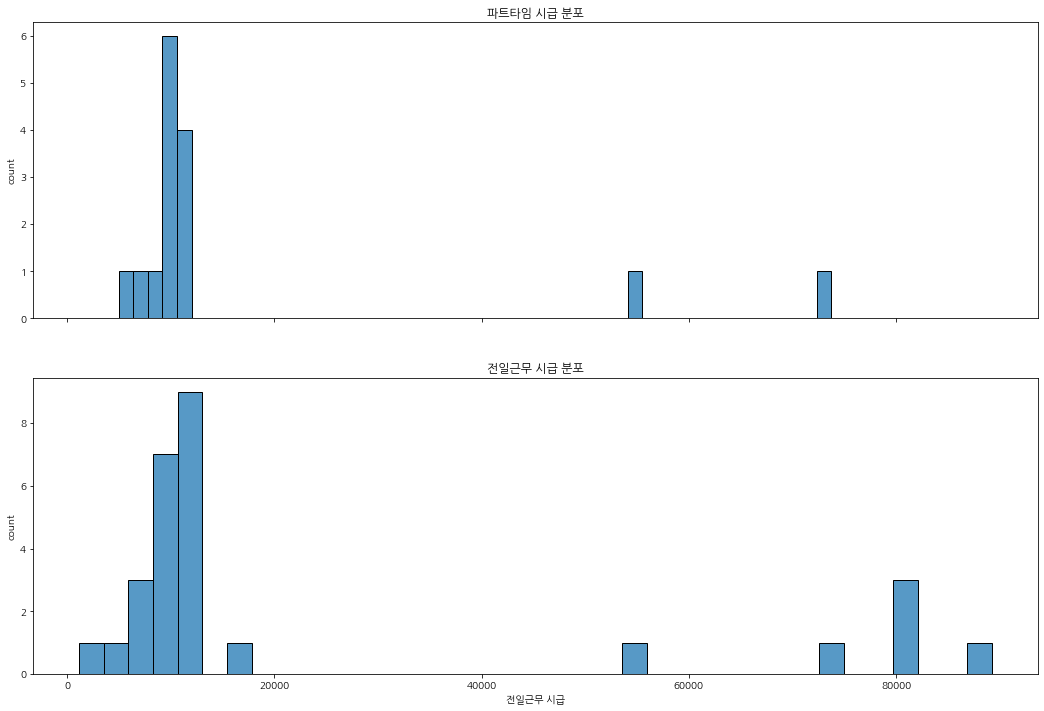

In [110]:
sub_df1 = df.groupby(by=['파트타임 시급'],as_index=False).count()
sub_df2 = df.groupby(by=['전일근무 시급'],as_index=False).count()
fig,axes = plt.subplots(2,1,figsize=(18,12),sharex=True)
sns.histplot(data=sub_df1[sub_df1['파트타임 시급']!=0]['파트타임 시급'],ax=axes[0]).set(title='파트타임 시급 분포',ylabel='count')
sns.histplot(data=sub_df2[sub_df2['전일근무 시급']!=0]['전일근무 시급'],ax=axes[1]).set(title='전일근무 시급 분포',ylabel='count')

[Text(0.5, 1.0, '전일근무 일근로시간 분포'), Text(0, 0.5, 'count')]

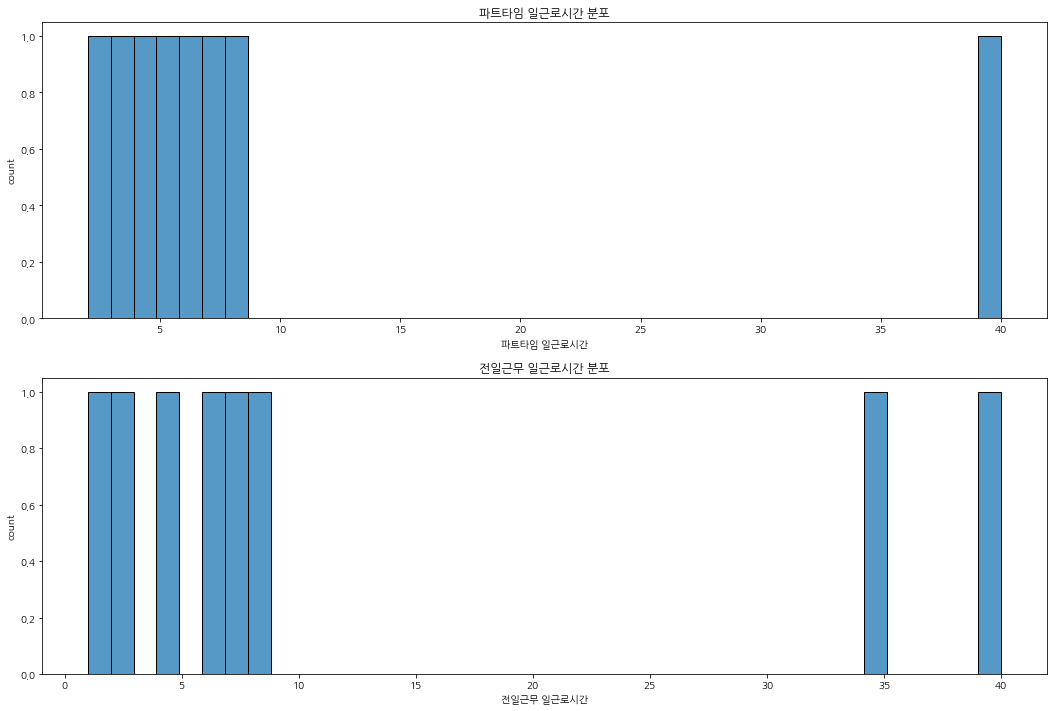

In [116]:
sub_df1 = df.groupby(by=['파트타임 일근로시간'],as_index=False).count()
sub_df2 = df.groupby(by=['전일근무 일근로시간'],as_index=False).count()
fig,axes = plt.subplots(2,1,figsize=(18,12))
sns.histplot(data=sub_df1[sub_df1['파트타임 일근로시간']!=0]['파트타임 일근로시간'],bins=40,ax=axes[0]).set(title='파트타임 일근로시간 분포',ylabel='count')
sns.histplot(data=sub_df2[sub_df2['전일근무 일근로시간']!=0]['전일근무 일근로시간'],bins=40,ax=axes[1]).set(title='전일근무 일근로시간 분포',ylabel='count')

[Text(0.5, 1.0, '연도별 전일근무 시급 평균')]

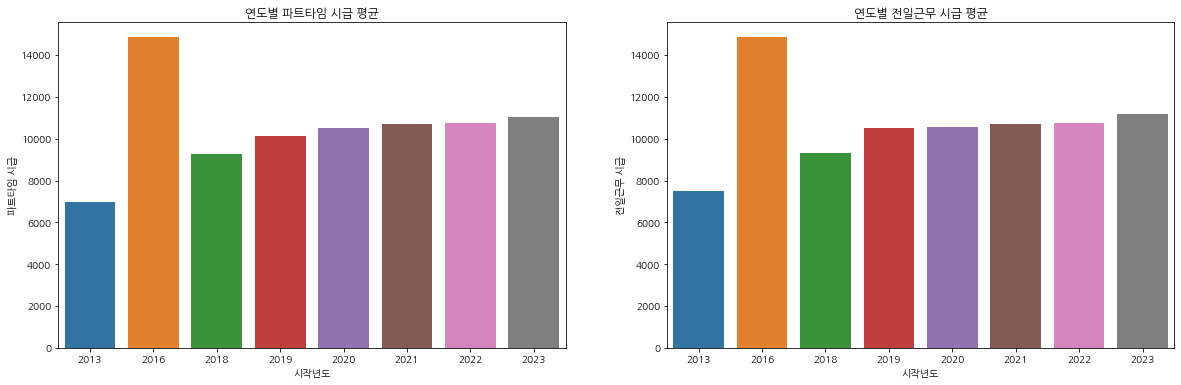

In [123]:
sub_df = df[(df['파트타임 시급']!=0)&(df['전일근무 시급']!=0)].groupby(by=['시작년도'],as_index=False)['파트타임 시급','전일근무 시급'].mean()
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.barplot(data=sub_df,x='시작년도',y='파트타임 시급',ax=axes[0]).set(title='연도별 파트타임 시급 평균')
sns.barplot(data=sub_df,x='시작년도',y='전일근무 시급',ax=axes[1]).set(title='연도별 전일근무 시급 평균')

[Text(0.5, 1.0, '월별 전일근무 시급 평균')]

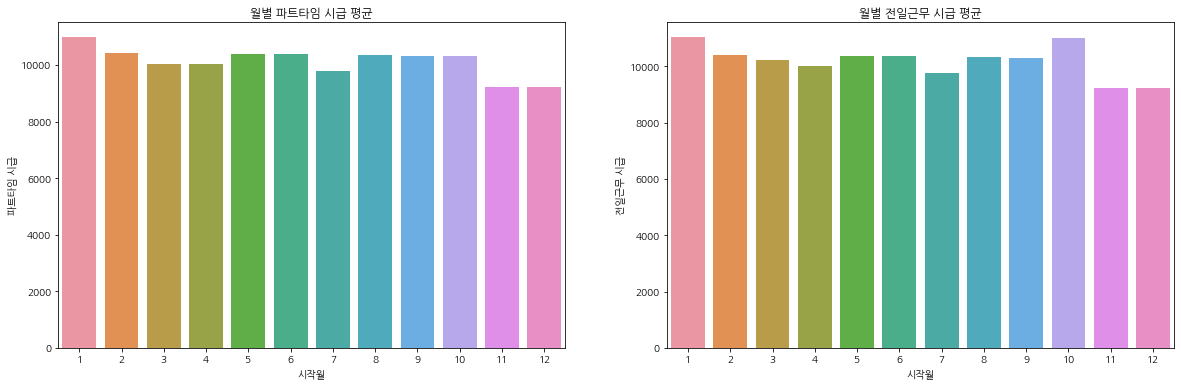

In [126]:
sub_df = df[(df['파트타임 시급']!=0)&(df['전일근무 시급']!=0)].groupby(by=['시작월'],as_index=False)['파트타임 시급','전일근무 시급'].mean()
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.barplot(data=sub_df,x='시작월',y='파트타임 시급',ax=axes[0]).set(title='월별 파트타임 시급 평균')
sns.barplot(data=sub_df,x='시작월',y='전일근무 시급',ax=axes[1]).set(title='월별 전일근무 시급 평균')

[Text(0.5, 1.0, '연도별 전일근무 일근로시간 평균')]

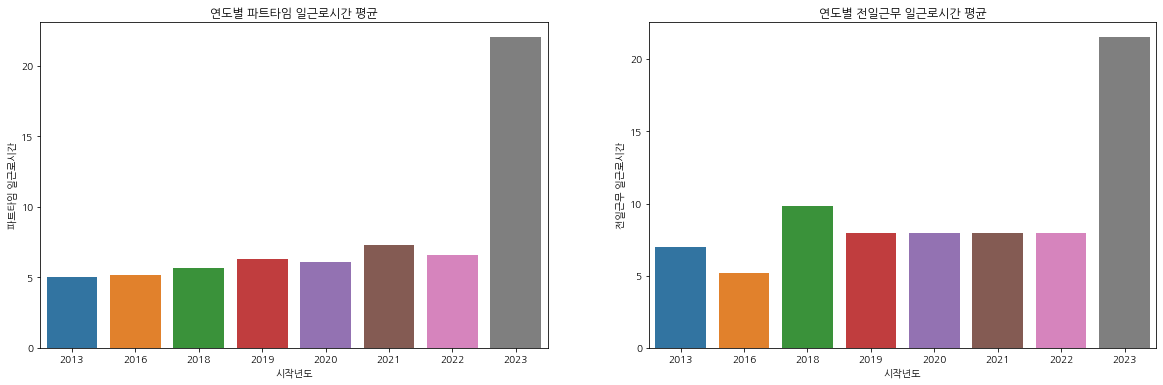

In [124]:
sub_df = df[(df['파트타임 일근로시간']!=0)&(df['전일근무 일근로시간']!=0)].groupby(by=['시작년도'],as_index=False)['파트타임 일근로시간','전일근무 일근로시간'].mean()
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.barplot(data=sub_df,x='시작년도',y='파트타임 일근로시간',ax=axes[0]).set(title='연도별 파트타임 일근로시간 평균')
sns.barplot(data=sub_df,x='시작년도',y='전일근무 일근로시간',ax=axes[1]).set(title='연도별 전일근무 일근로시간 평균')

[Text(0.5, 1.0, '월별 전일근무 일근로시간 평균')]

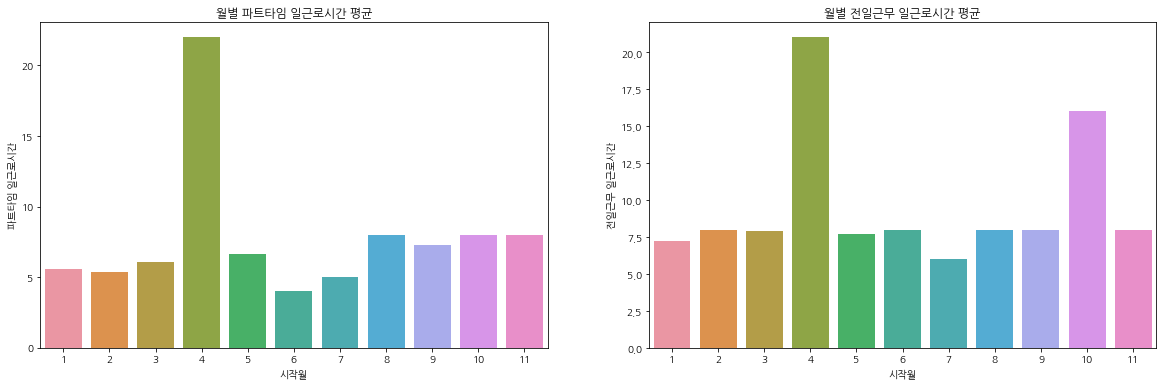

In [127]:
sub_df = df[(df['파트타임 일근로시간']!=0)&(df['전일근무 일근로시간']!=0)].groupby(by=['시작월'],as_index=False)['파트타임 일근로시간','전일근무 일근로시간'].mean()
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.barplot(data=sub_df,x='시작월',y='파트타임 일근로시간',ax=axes[0]).set(title='월별 파트타임 일근로시간 평균')
sns.barplot(data=sub_df,x='시작월',y='전일근무 일근로시간',ax=axes[1]).set(title='월별 전일근무 일근로시간 평균')

[Text(0.5, 1.0, '연도별 전일근무 계획인원')]

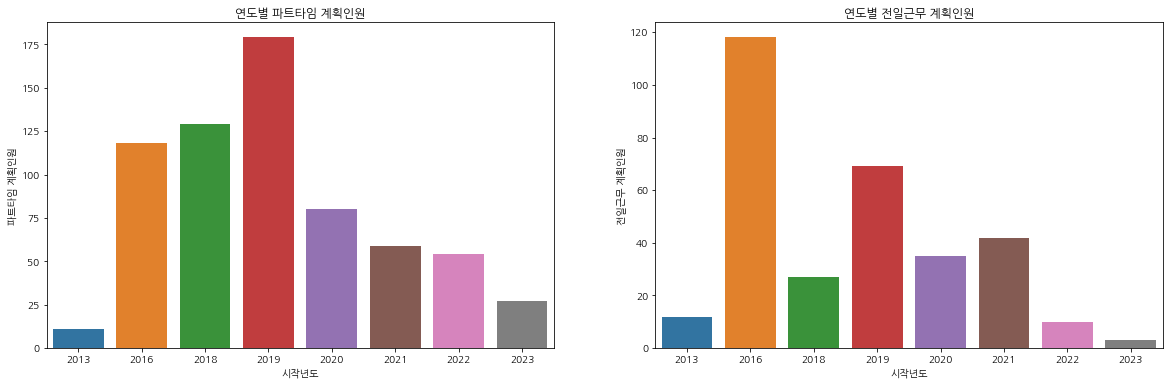

In [129]:
sub_df = df[(df['파트타임 계획인원']!=0)&(df['전일근무 계획인원']!=0)].groupby(by=['시작년도'],as_index=False)['파트타임 계획인원','전일근무 계획인원'].sum()
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.barplot(data=sub_df,x='시작년도',y='파트타임 계획인원',ax=axes[0]).set(title='연도별 파트타임 계획인원')
sns.barplot(data=sub_df,x='시작년도',y='전일근무 계획인원',ax=axes[1]).set(title='연도별 전일근무 계획인원')

[Text(0.5, 1.0, '월별 전일근무 계획인원')]

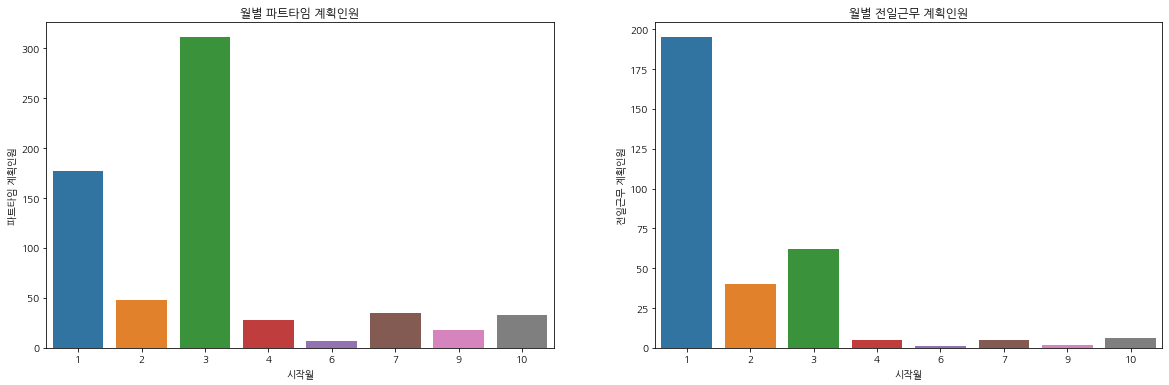

In [130]:
sub_df = df[(df['파트타임 계획인원']!=0)&(df['전일근무 계획인원']!=0)].groupby(by=['시작월'],as_index=False)['파트타임 계획인원','전일근무 계획인원'].sum()
fig,axes = plt.subplots(1,2,figsize=(20,6))
sns.barplot(data=sub_df,x='시작월',y='파트타임 계획인원',ax=axes[0]).set(title='월별 파트타임 계획인원')
sns.barplot(data=sub_df,x='시작월',y='전일근무 계획인원',ax=axes[1]).set(title='월별 전일근무 계획인원')